In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print('Number of Passenger in the train dataset:'+ str(len(train)))

Number of Passenger in the train dataset:891


In [6]:
print('Number of Passenger in the train dataset:'+ str(len(test)))

Number of Passenger in the train dataset:418


<AxesSubplot:xlabel='Survived', ylabel='count'>

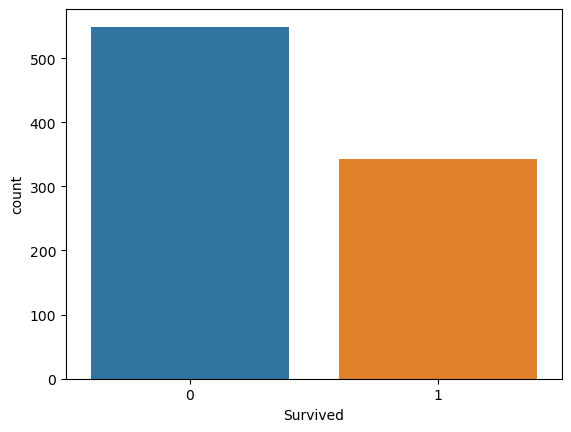

In [7]:
#heres we have to analyse the data set therefore

sns.countplot(x= 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

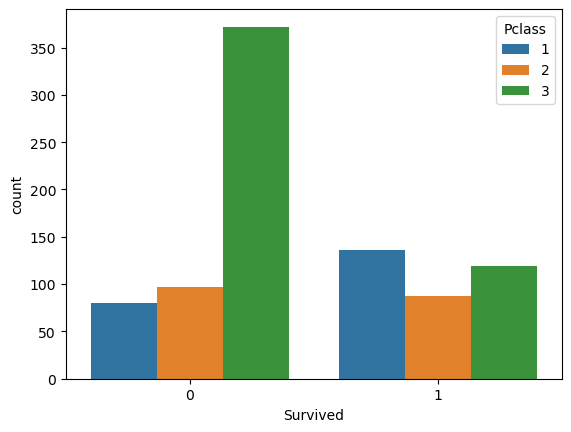

In [8]:
# Number of passenger saved based on the class they were travelling

sns.countplot(x='Survived', hue = 'Pclass', data = train)

<AxesSubplot:ylabel='Frequency'>

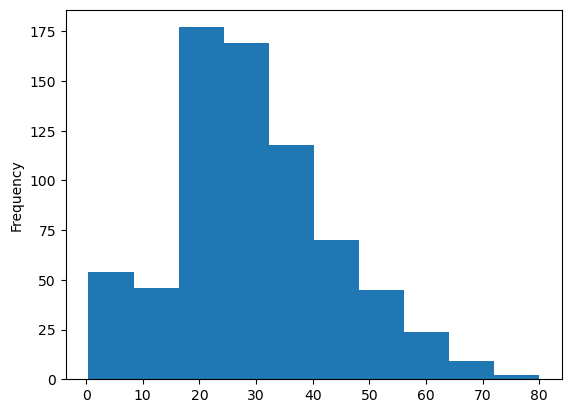

In [9]:
#  Frequency of passengers group by Age

train['Age'].plot.hist()

In [10]:
#majority of the the passangers are in and around the mark of 18 to 50, also there are some ouliers at 80 and 0 to 10

<AxesSubplot:ylabel='Frequency'>

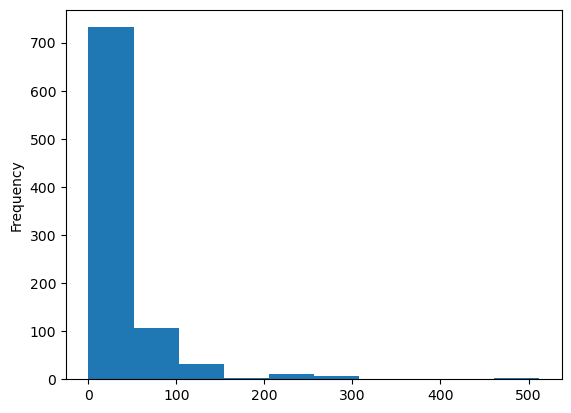

In [11]:
#frequency of passenger group by fare

train['Fare'].plot.hist()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

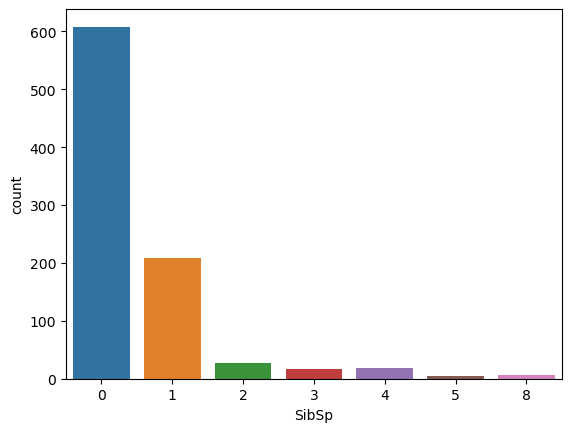

In [13]:
# Number of siblings and spouses on board

sns.countplot(x = 'SibSp', data = train)

In [14]:
# checking the null values in the train data set

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

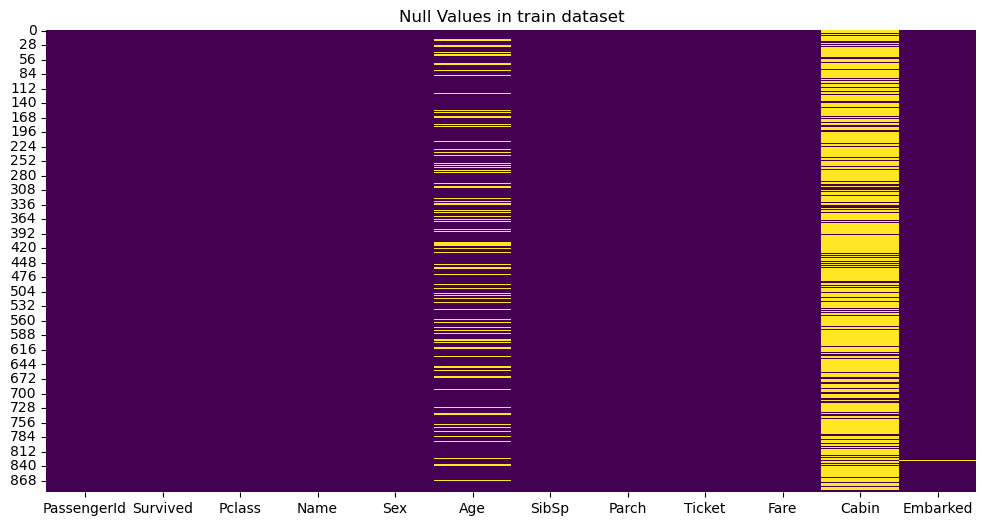

In [15]:
# Visualizing the null values in the DataFrame i.e train
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in train dataset')
plt.show()

In [16]:
# most null values comes from the age and the cabin 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

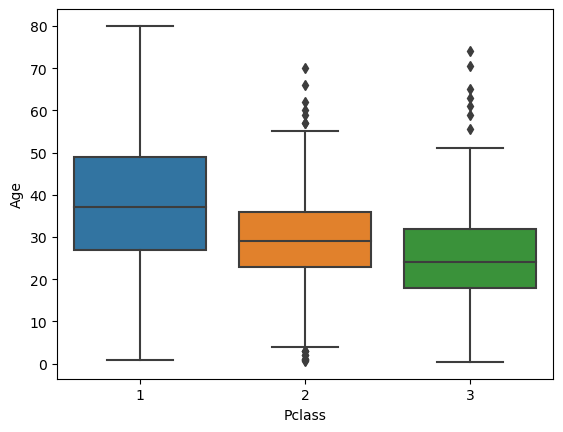

In [17]:
# Passenger Class vs Age

# this will gives us an idea of outliers 


sns.boxplot(x = 'Pclass', y = 'Age', data =  train) 

In [18]:
# Now we're conducting the data preprocessing 

sex = pd.get_dummies(train['Sex'], drop_first = True)

embark = pd.get_dummies(train['Embarked'], drop_first = True)

pcl = pd.get_dummies(train['Pclass'], drop_first = True)


In [19]:
train = pd.concat([train,sex,embark,pcl],axis=1) 
# pd.concat() is used to concatenate two or more pandas objects along a particular axis (row or column). 
#It is commonly used to combine DataFrames or Series.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [20]:
# Dropping the columns from the data set 

train.drop(['Pclass', 'Sex', 'Embarked', 'Cabin', 'PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [21]:
# Check the column names in the DataFrame
print(train.columns)



Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')


In [22]:
# Drop the last two columns if they are not needed
train.drop([train.columns[-2], train.columns[-1]], axis=1, inplace=True)

# Replace NaN values with 0 in columns 'male', 'Q', and 'S'
train[['male', 'Q', 'S']] = train[['male', 'Q', 'S']].fillna(0)

# Convert 'male', 'Q', and 'S' columns to numerical values
train[['male', 'Q', 'S']] = train[['male', 'Q', 'S']].astype(int)

# Display the updated DataFrame
print(train)


# we had to remove the columns as 2,3 as they were Nan and modify our data much further for better result

     Survived   Age  SibSp  Parch     Fare  male  Q  S
0           0  22.0      1      0   7.2500     1  0  1
1           1  38.0      1      0  71.2833     0  0  0
2           1  26.0      0      0   7.9250     0  0  1
3           1  35.0      1      0  53.1000     0  0  1
4           0  35.0      0      0   8.0500     1  0  1
..        ...   ...    ...    ...      ...   ... .. ..
886         0  27.0      0      0  13.0000     1  0  1
887         1  19.0      0      0  30.0000     0  0  1
888         0   NaN      1      2  23.4500     0  0  1
889         1  26.0      0      0  30.0000     1  0  0
890         0  32.0      0      0   7.7500     1  1  0

[891 rows x 8 columns]


In [23]:
#Handling NULL values
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value = train_values)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [24]:
# handeling the test data

sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pcl = pd.get_dummies(test['Pclass'],drop_first=True)


In [25]:
test = pd.concat([test,sex,embark,pcl],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [26]:
# removing the not so important data from out test dataset

test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [27]:
#checking the null values

test.isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64

In [28]:
# handeling the null vales as it seems age has the highest 

test_values = {'Age':round(np.mean(test['Age'])), 'Fare':round(np.mean(test['Fare']))}
test = test.fillna(value = test_values)


test.head()





,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [29]:
# Replace NaN values with 0 in columns 'male', 'Q', and 'S'
test[['male', 'Q', 'S']] = test[['male', 'Q', 'S']].fillna(0)

# Convert 'male', 'Q', and 'S' columns to numerical values
test[['male', 'Q', 'S']] = test[['male', 'Q', 'S']].astype(int)




In [30]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [31]:
test.drop([2, 3], axis=1, inplace=True)



In [32]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S
0,34.5,0,0,7.8292,1,1,0
1,47.0,1,0,7.0000,0,0,1
2,62.0,0,0,9.6875,1,1,0
3,27.0,0,0,8.6625,1,0,1
4,22.0,1,1,12.2875,0,0,1


In [33]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [35]:
# defining the model type

logmodel = LogisticRegression(solver = 'liblinear')

In [36]:
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [37]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(solver='liblinear')

In [38]:
predictions = logmodel.predict(X_test)


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       153
           1       0.77      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [40]:
print(confusion_matrix(y_test, predictions))


[[132  21]
 [ 43  72]]


In [41]:
print(accuracy_score(y_test, predictions))
# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC Score:", roc_auc)


0.7611940298507462
ROC-AUC Score: 0.7444160272804774


In [42]:
test_predictions = logmodel.predict(test)

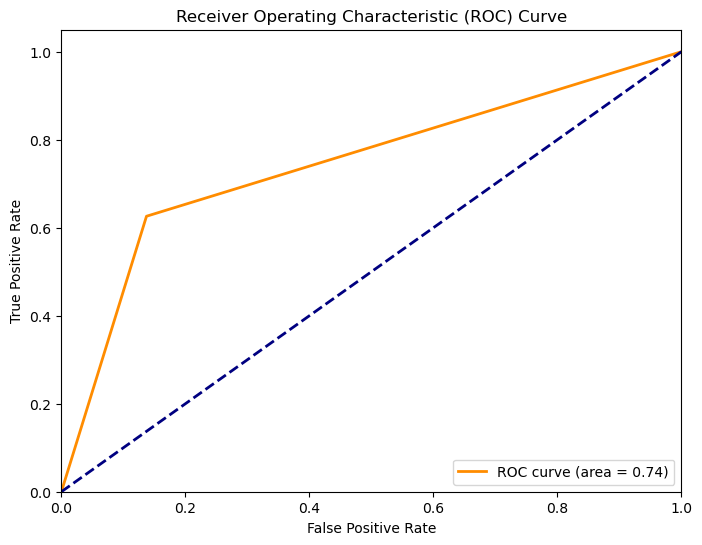

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_test' is the true labels and 'predictions' are the predicted labels
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
#The model's accuracy score is 0.761, indicating that it correctly predicted the survival status for 76.1% of the instances.


#The ROC-AUC score is 0.744, which measures the model's ability to discriminate between positive and negative classes.

#The confusion matrix is [[132, 21], [43, 72]], where:
#132 instances were correctly predicted as not survived (true negatives).
#21 instances were incorrectly predicted as survived (false positives).
#43 instances were incorrectly predicted as not survived (false negatives).
#72 instances were correctly predicted as survived (true positives).


#Now, interpreting the coefficients of the logistic regression model requires the actual coefficients and feature names.

#Positive coefficients indicate that as the feature increases, the probability of the target variable being positive (survived) also increases.
#Negative coefficients indicate that as the feature increases, the probability of the target variable being positive decreases.
#The magnitude of the coefficients shows the strength of the relationship between the feature and the target variable.
#Statistical significance is important to ensure that the relationship is not due to chance.
#Interpretation should consider the linear assumption and the potential for interactions or non-linear effects.





